In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import mplfinance as mpf

BTC_NAV=0.00095059
ETH_NAV=0.01030231
BCH_NAV=0.00932072
ETC_NAV=0.89578108
LTC_NAV=0.09320723

columns = ['Percent Cost', 'Percent SP', 'Percent', 'Close', 'Value']

%matplotlib inline

In [3]:
def get_ticker_history(ticker, period='3y', interval='1d'):
    t = yf.Ticker(ticker)
    return t.history(period=period, interval=interval)

def get_crypto_and_stock(crypto_ticker, stock_ticker, crypto_per_share, period='3y', interval='1d'):
    crypto = get_ticker_history(crypto_ticker, period=period, interval=interval)
    stock = get_ticker_history(stock_ticker, period=period, interval=interval)    

    df = pd.DataFrame({'Value': crypto['Close'] * crypto_per_share})
    df1 = pd.DataFrame({'Percent': (stock['Close'] - df['Value']) / stock['Close']})
    df2 = stock.join([df, df1]).dropna()

    return (crypto[crypto.index >= df2.index[0]], df2)

def get_gbtc(period='5y', interval='1d'):
    return get_crypto_and_stock('BTC-USD', 'GBTC', BTC_NAV, period=period, interval=interval)

def get_bchg(period='3y', interval='1d'):
    return get_crypto_and_stock('BCH-USD', 'BCHG', BCH_NAV, period=period, interval=interval)

def get_ethe(period='3y', interval='1d'):
    return get_crypto_and_stock('ETH-USD', 'ETHE', ETH_NAV, period=period, interval=interval)

def get_etcg(period='3y', interval='1d'):
    return get_crypto_and_stock('ETC-USD', 'ETCG', ETC_NAV, period=period, interval=interval)

def get_ltcn(period='3y', interval='1d'):
    return get_crypto_and_stock('LTC-USD', 'LTCN', ETC_NAV, period=period, interval=interval)

def get_close_prices(crypto, stock):
    df = pd.DataFrame({'Crypto Close': crypto['Close'], 'Stock Close': stock['Close']}).dropna()
    comp = df.pct_change().dropna()
    return pd.DataFrame({'Crypto Close': df['Crypto Close'],
                         'Stock Close': df['Stock Close'],
                         'Crypto Percent': comp['Crypto Close'],
                         'Stock Percent': comp['Stock Close'],
                         'Stock Gain': comp['Stock Close'] - comp['Crypto Close'],
                         'Stock Outperform': comp['Stock Close'] > comp['Crypto Close'],
                        }).dropna()

def buy_at_25(df, df_sp500, cost=10000):
    df_sp = df_sp500[(df_sp500.index >= df.index[0]) & (df_sp500.index <= df.index[-1])]
    buy_point = df['Percent'] <= df['Percent'].describe()['25%']
    cur_price = df.iloc[-1]['Close']
    cur_price_sp = df_sp.iloc[-1]['Close']
    
    shares = cost / df[buy_point]['Close']
    shares_sp = cost / df_sp[buy_point]['Close']
    values = cur_price * shares
    values_sp = cur_price_sp * shares_sp
    
    df1 = pd.DataFrame({'Shares': shares,
                        'Values': values,
                        'Values SP': values_sp,
                        'Percent Cost': (values - cost) / cost,
                        'Percent SP': (values - values_sp) / values_sp
                       })
    return df1.join(df)

def buy_strategy(df, percentiles=[0.1,0.25,0.3,0.4,0.5]):
    percents = df['Percent'].quantile(percentiles)
    return pd.DataFrame({'Percent': percents, 'Price': df.iloc[-1]['Value'] / (1 - percents)})

def buy_if(df, crypto_price):
    pd.Series()

def draw_candlestick(df, title):
    mpf.plot(df, type='candle', style='yahoo', mav=(5,20,60), volume=True, figsize=(18, 8), title=title)

def draw_premium(df):
    df['Value'].plot(label='Crypto Value', figsize=(18,8))
    df['Close'].plot(label='Stock Value')
    plt.legend()
    plt.show()

def draw_premium_percentage(df):
    plt.ylim([-0.25,1.0])
    df['Percent'].plot.area(figsize=(18,8))
    plt.title('Premium percentage')
    plt.show()

def draw_premium_with_percentage(df, kind='area'):
    fig = plt.figure(figsize=(18,8))
    ax1 = plt.subplot2grid((8,1), (0,0), rowspan=5, colspan=1)
    ax1.get_xaxis().set_visible(False)    
    ax2 = plt.subplot2grid((8,1), (5,0), rowspan=3, colspan=1, sharex=ax1)
    df['Value'].plot(ax=ax1, label='Crypto Close')
    df['Close'].plot(ax=ax1, label='Stock Close')
    df['Percent'].plot(ax=ax2, kind=kind)
    ax1.legend()

In [4]:
btc, gbtc = get_crypto_and_stock('BTC-USD', 'GBTC', BTC_NAV, period='5y')

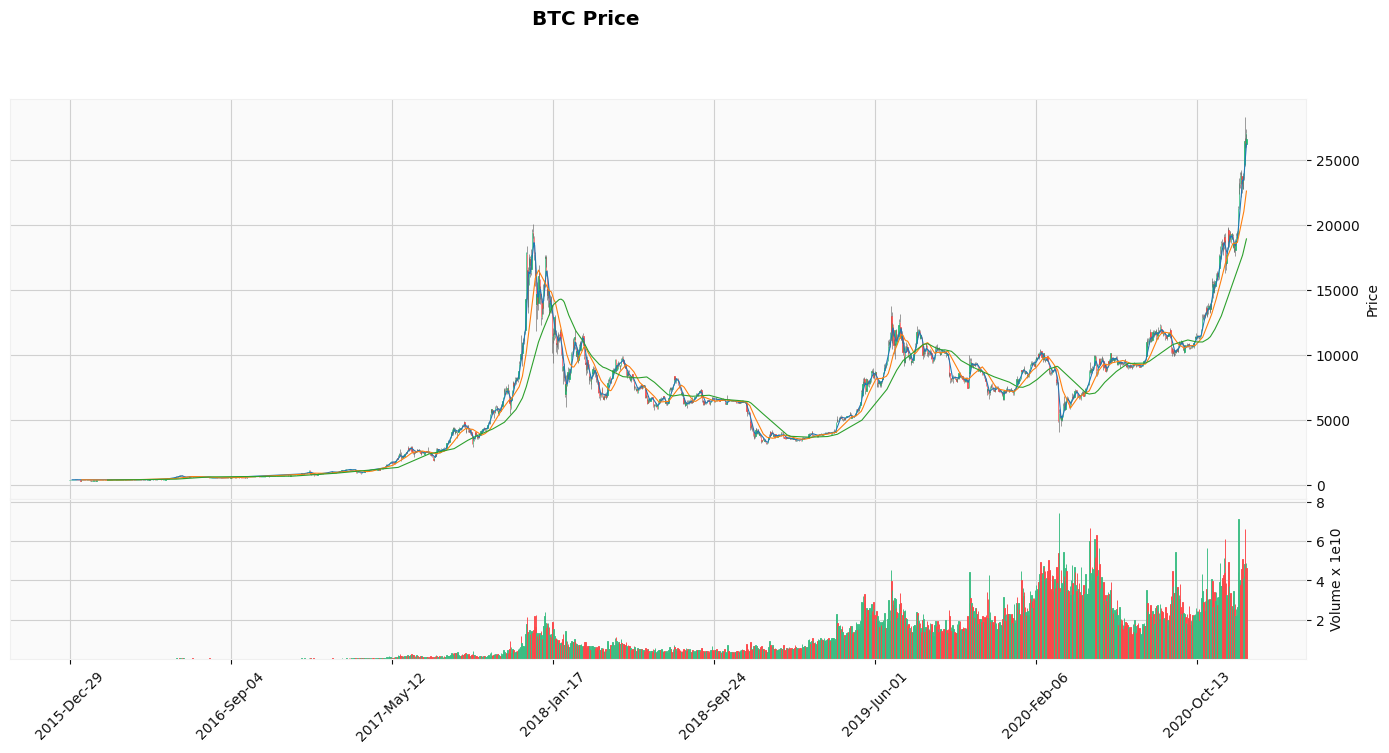

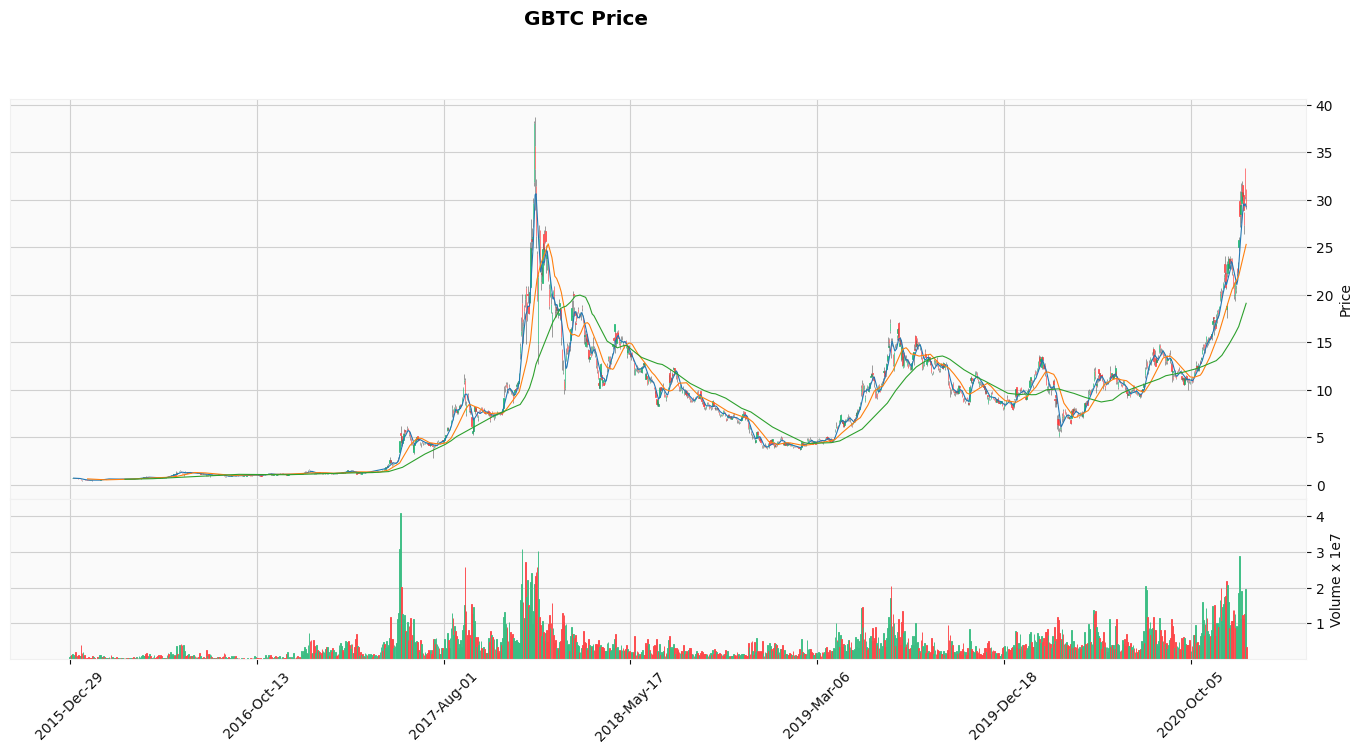

In [5]:
%matplotlib inline
draw_candlestick(btc, 'BTC Price')
draw_candlestick(gbtc, 'GBTC Price')

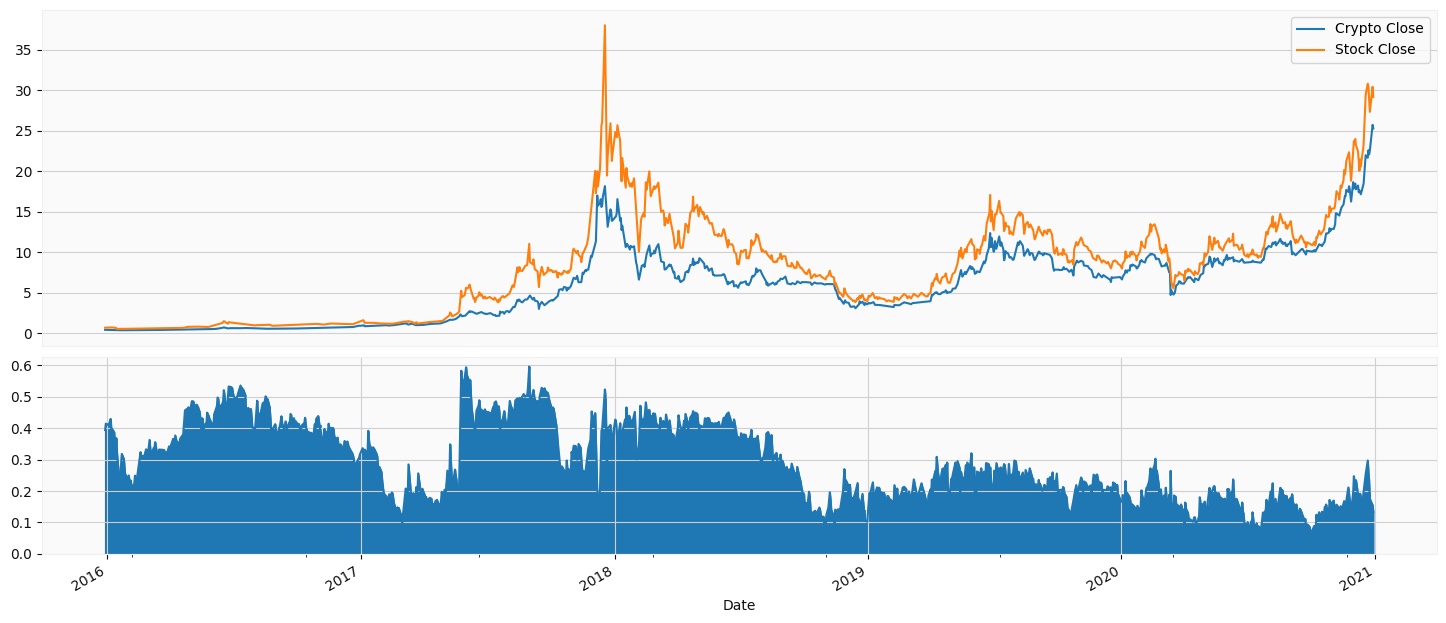

In [6]:
draw_premium_with_percentage(gbtc)

In [7]:
eth, ethe = get_crypto_and_stock('ETH-USD', 'ETHE', ETH_NAV, period='3y')

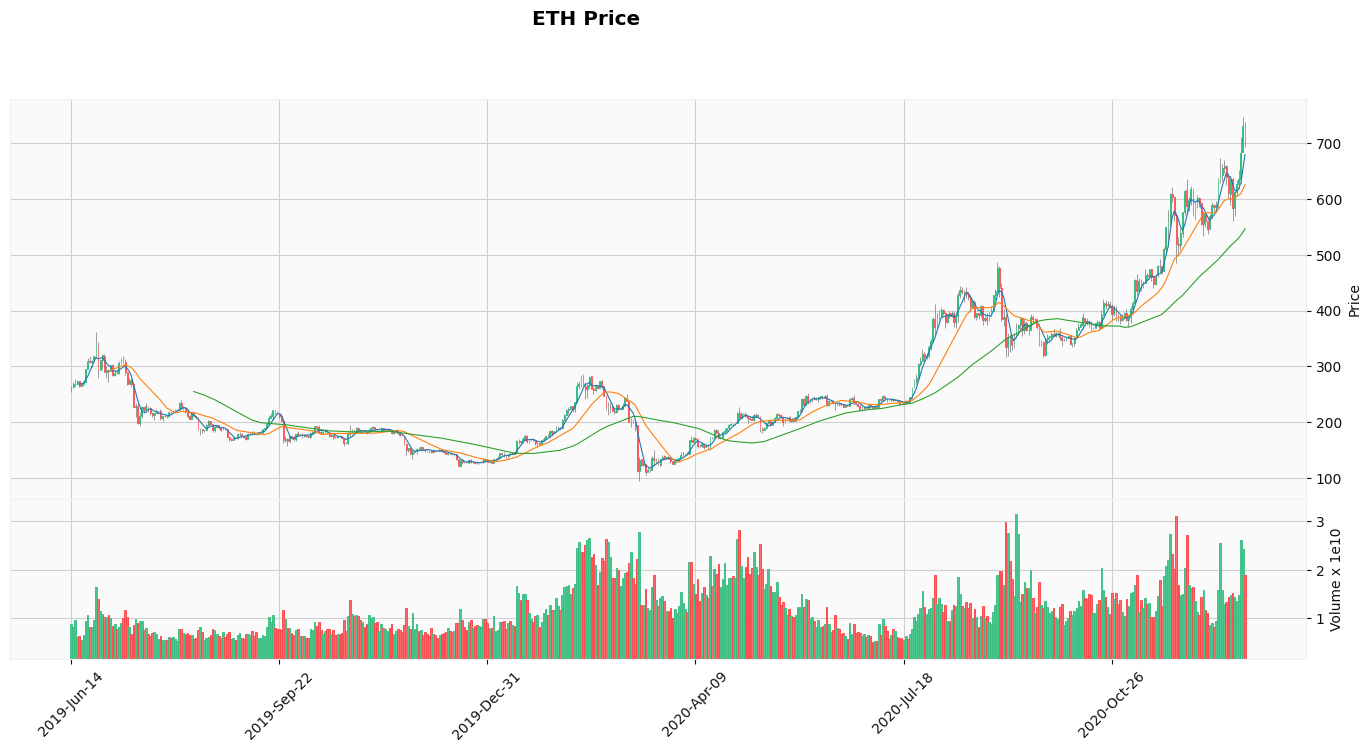

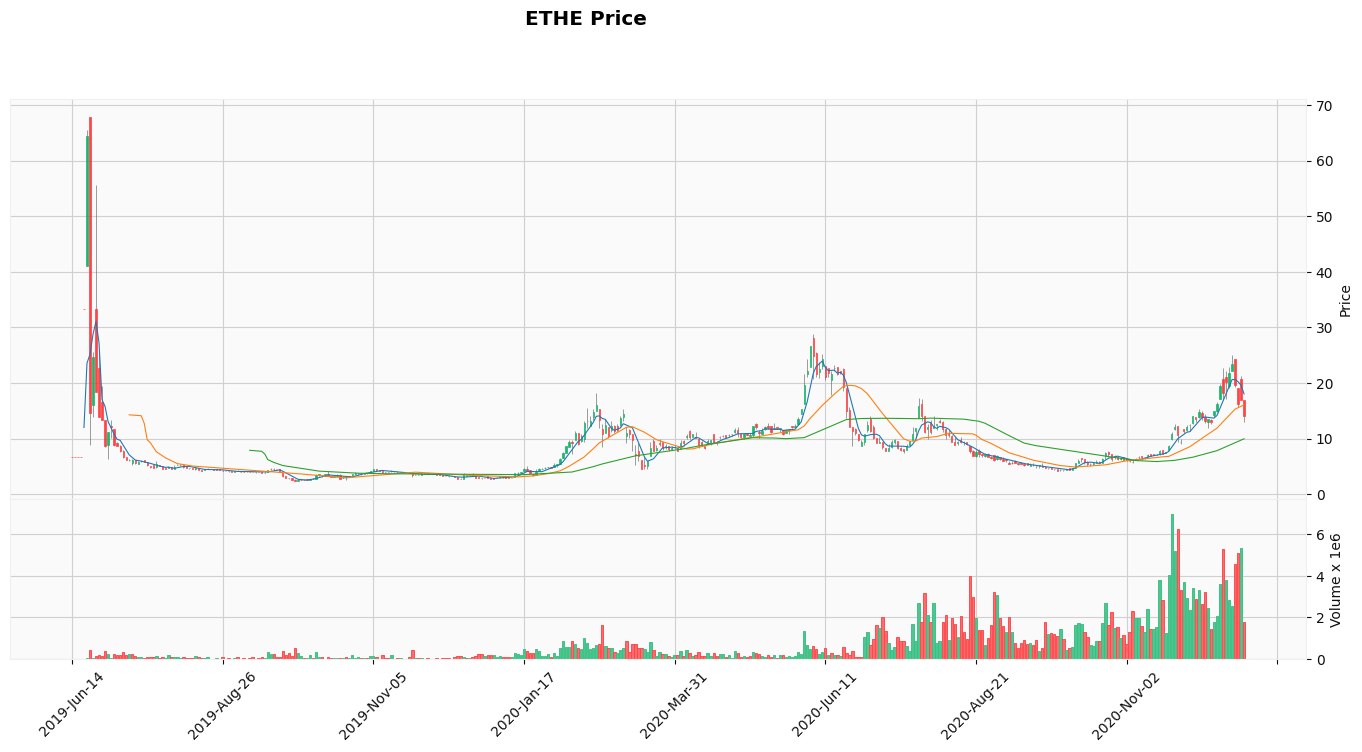

In [8]:
%matplotlib inline
draw_candlestick(eth, 'ETH Price')
draw_candlestick(ethe, 'ETHE Price')

count    390.000000
mean       0.589462
std        0.185105
min        0.128419
25%        0.480384
50%        0.565259
75%        0.775644
max        0.952855
Name: Percent, dtype: float64

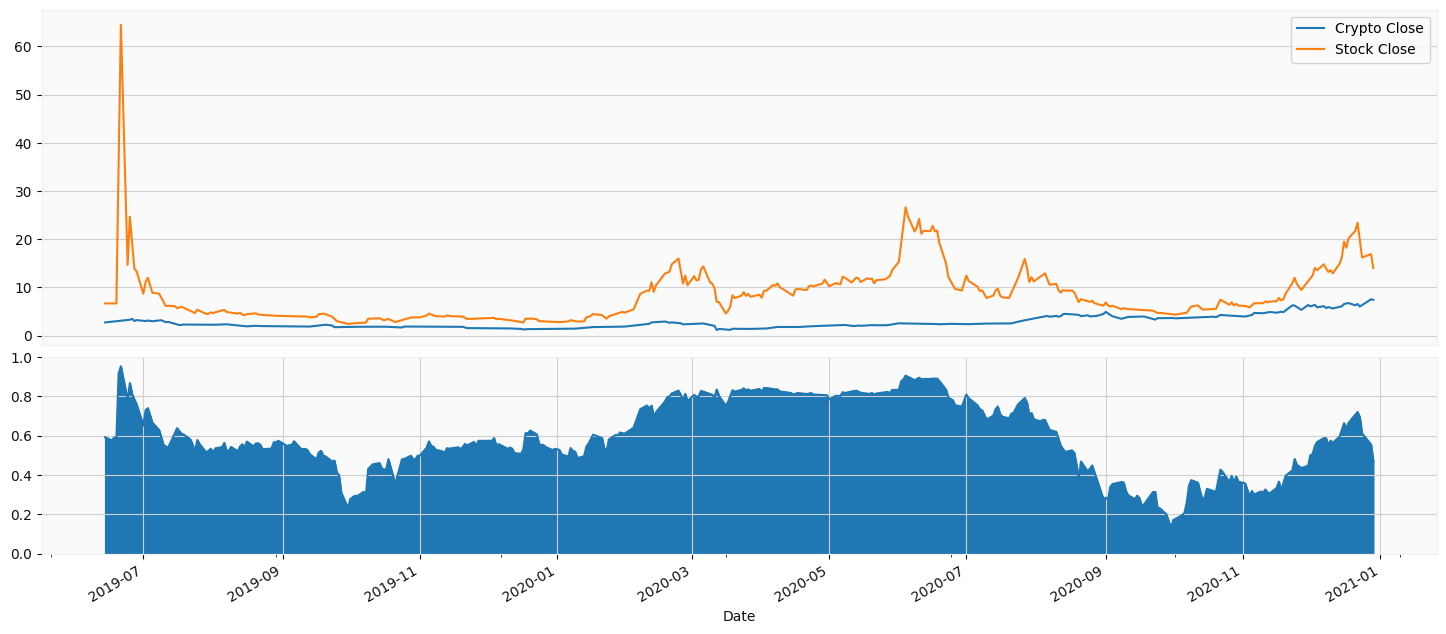

In [9]:
draw_premium_with_percentage(ethe)
ethe['Percent'].describe()

In [10]:
bch, bchg = get_crypto_and_stock('BCH-USD', 'BCHG', BCH_NAV, period='3y')

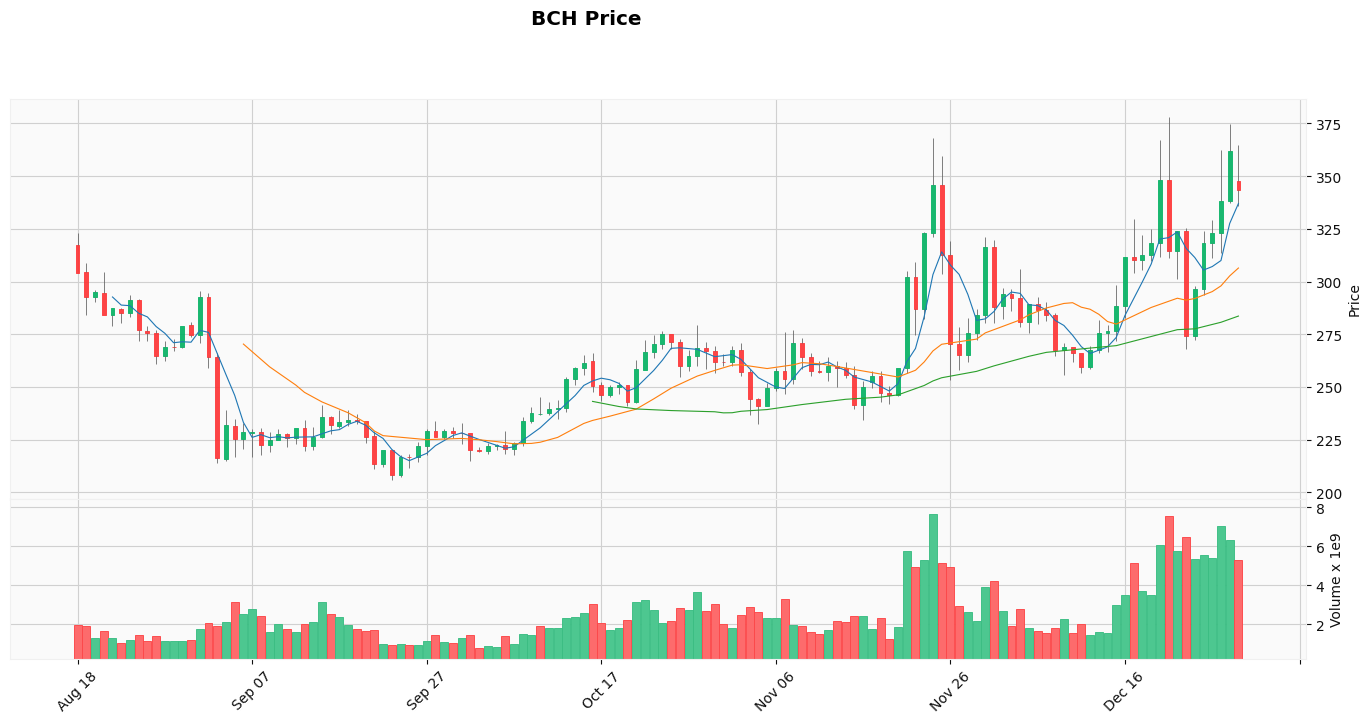

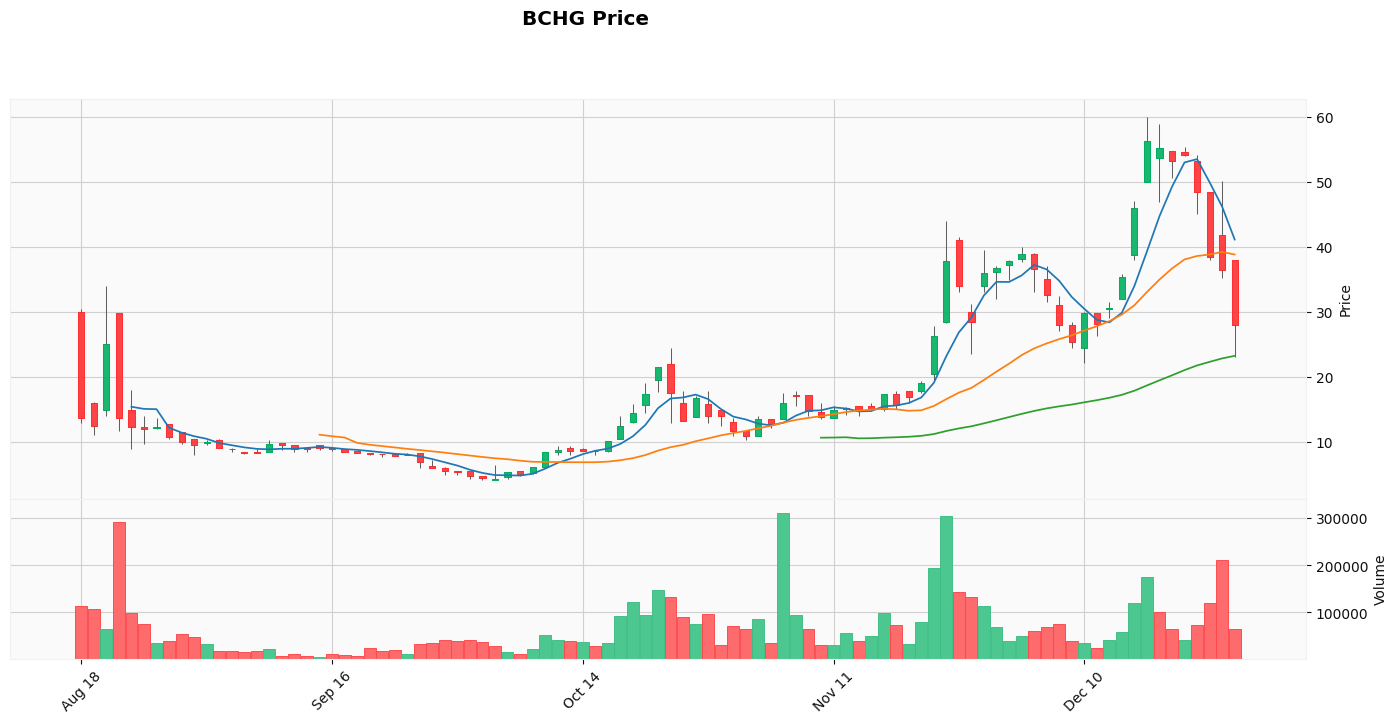

In [11]:
%matplotlib inline
draw_candlestick(bch, 'BCH Price')
draw_candlestick(bchg, 'BCHG Price')

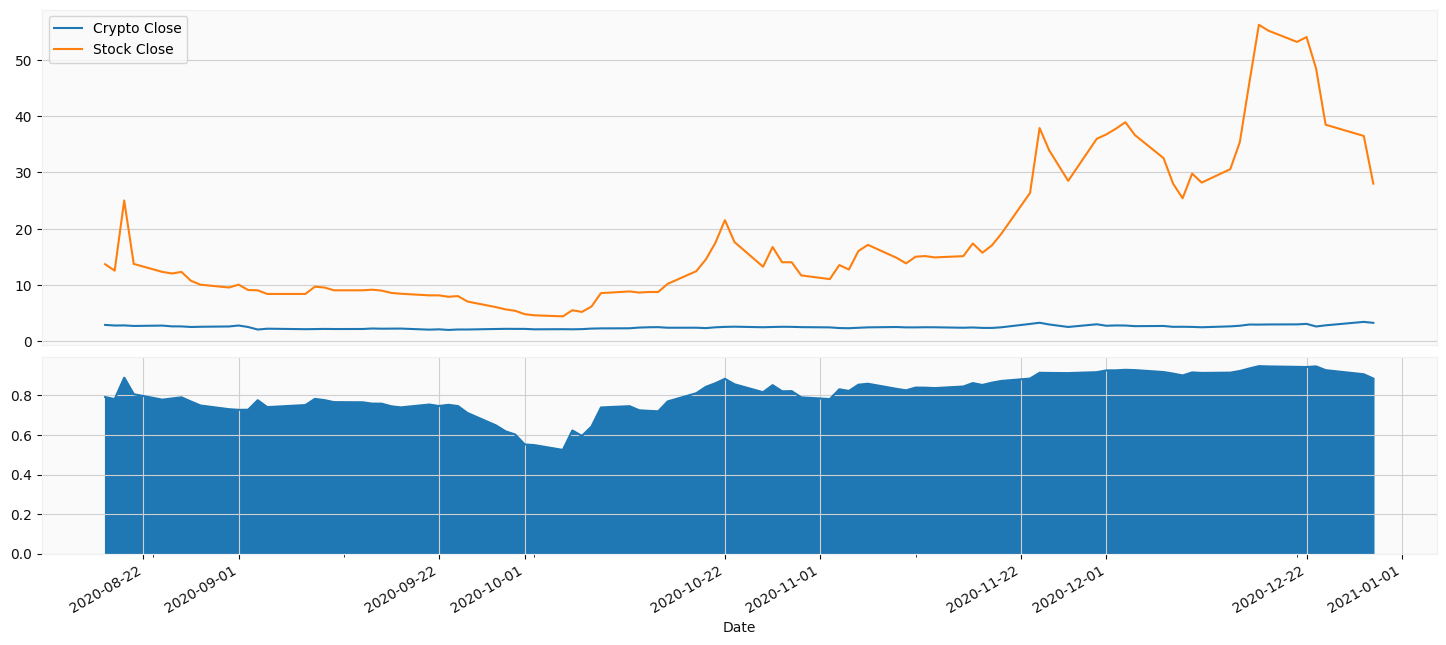

In [12]:
draw_premium_with_percentage(bchg)

In [13]:
etc, etcg = get_crypto_and_stock('ETC-USD', 'ETCG', ETC_NAV, period='3y')

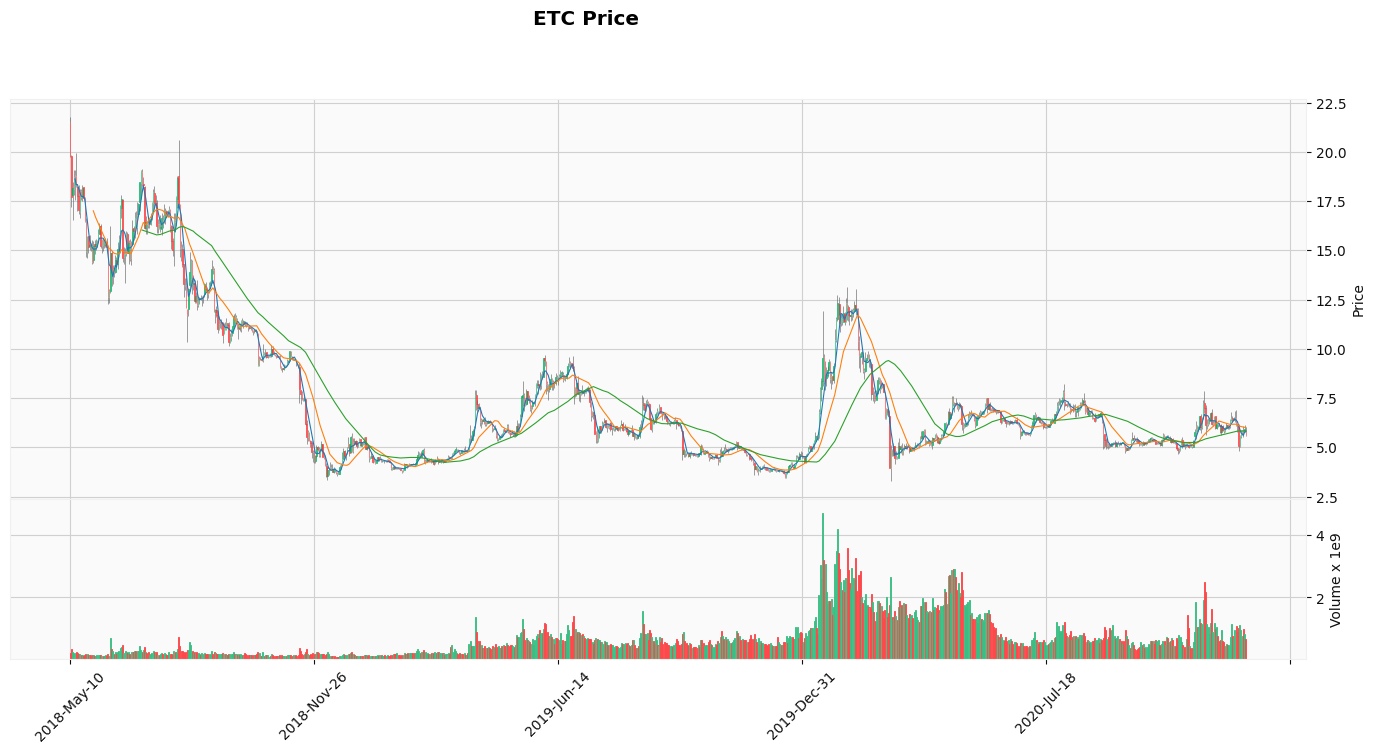

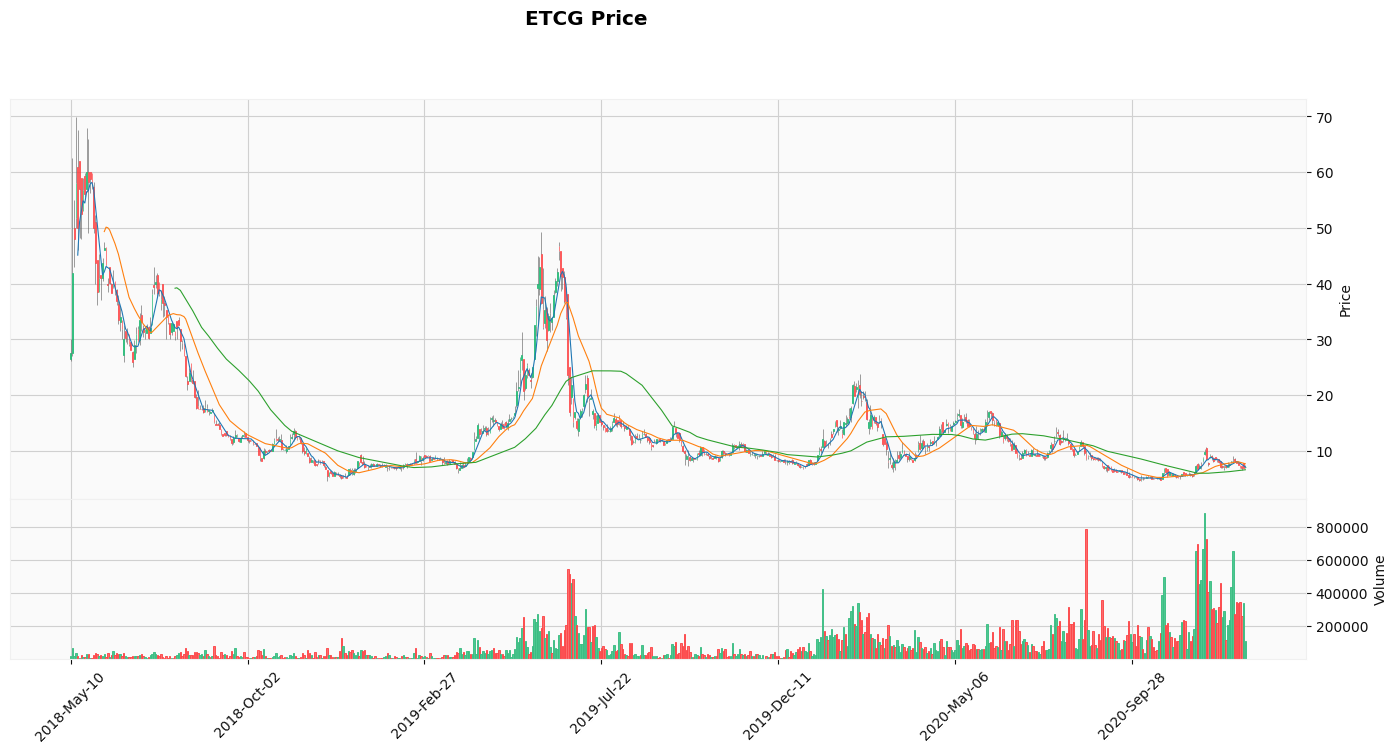

In [14]:
%matplotlib inline
draw_candlestick(etc, 'ETC Price')
draw_candlestick(etcg, 'ETCG Price')

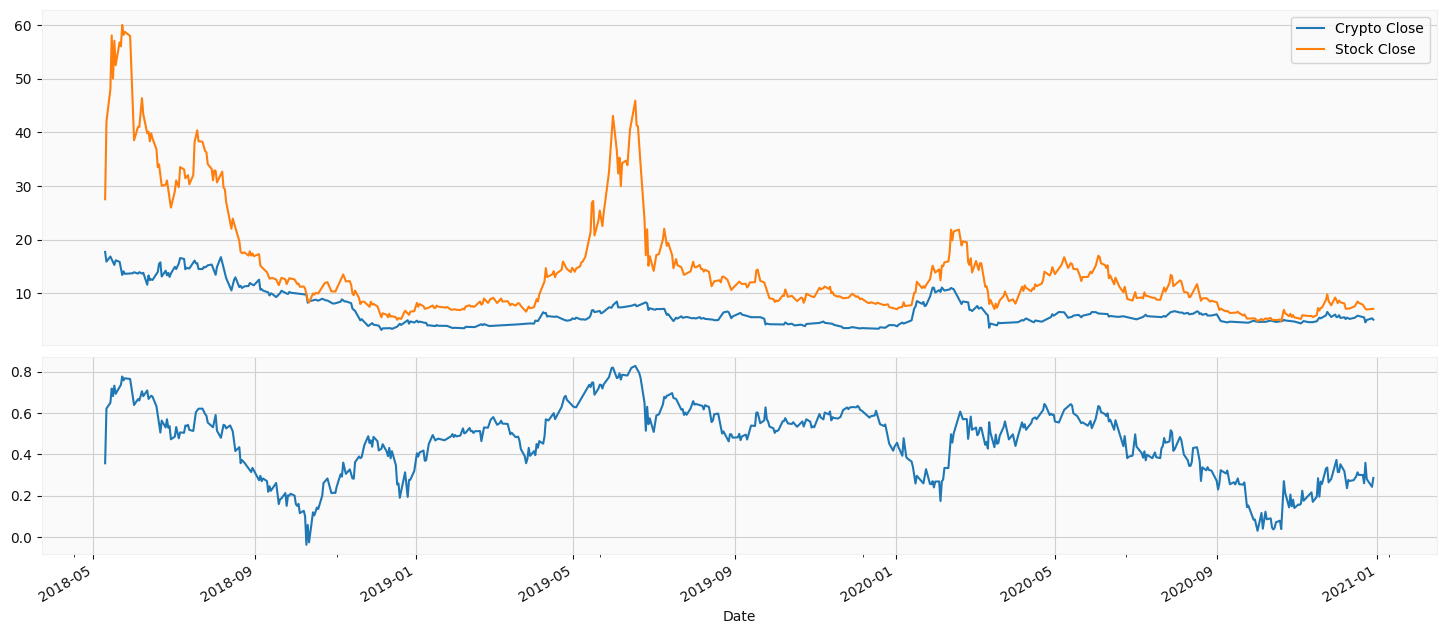

In [15]:
draw_premium_with_percentage(etcg, kind='line')

In [16]:
ltc, ltcn = get_crypto_and_stock('LTC-USD', 'LTCN', LTC_NAV, period='3y')

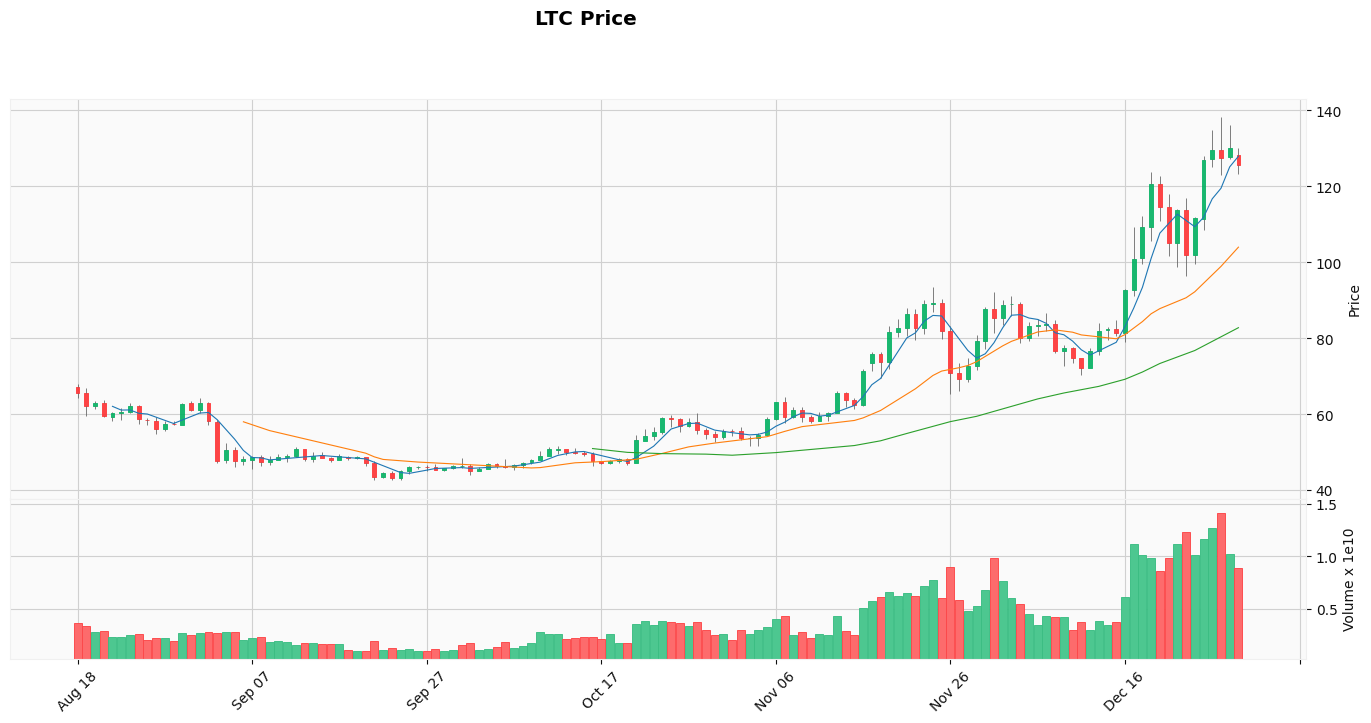

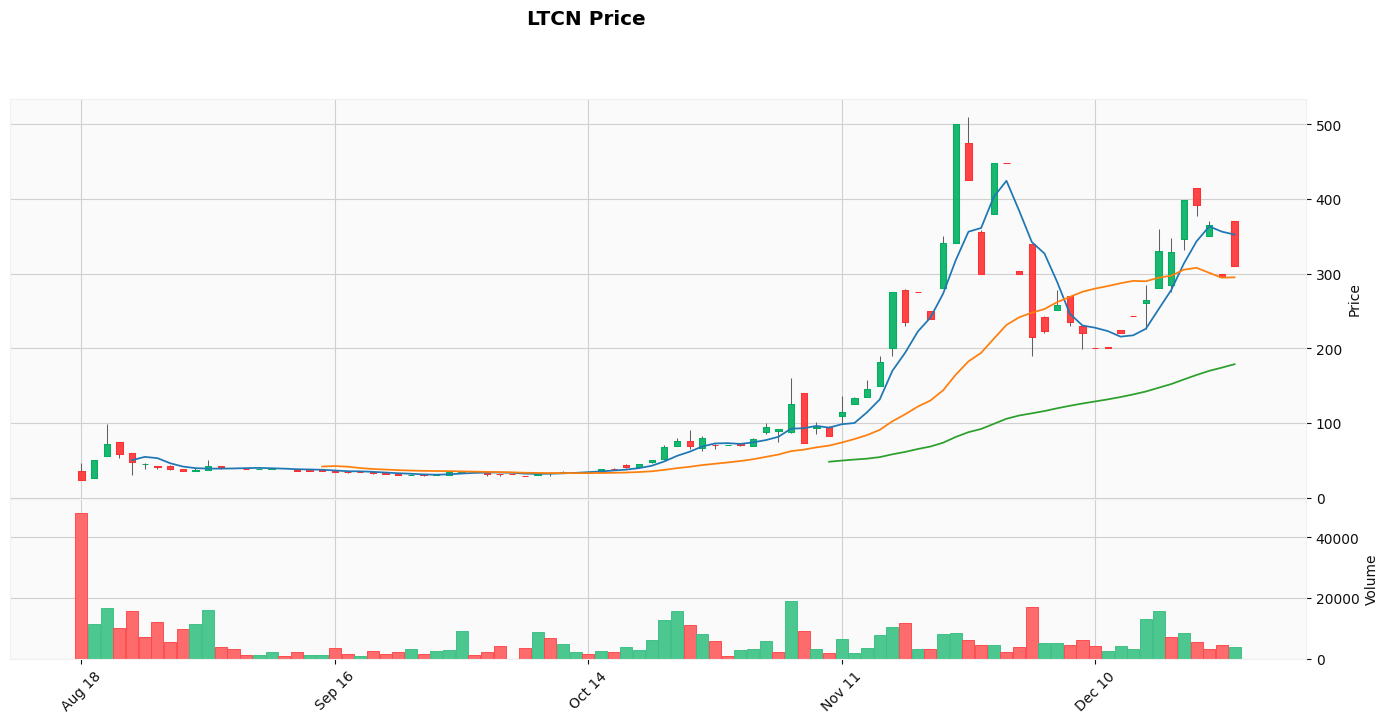

In [17]:
%matplotlib inline
draw_candlestick(ltc, 'LTC Price')
draw_candlestick(ltcn, 'LTCN Price')

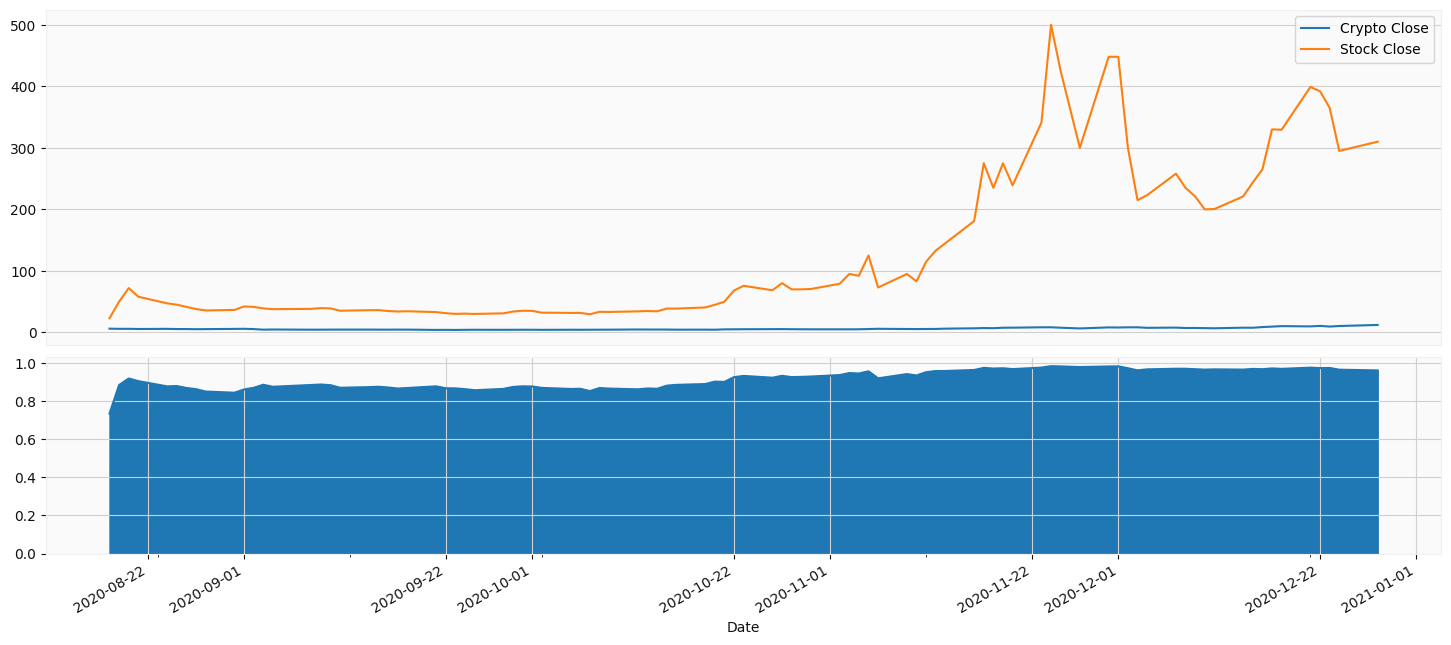

In [18]:
draw_premium_with_percentage(ltcn)

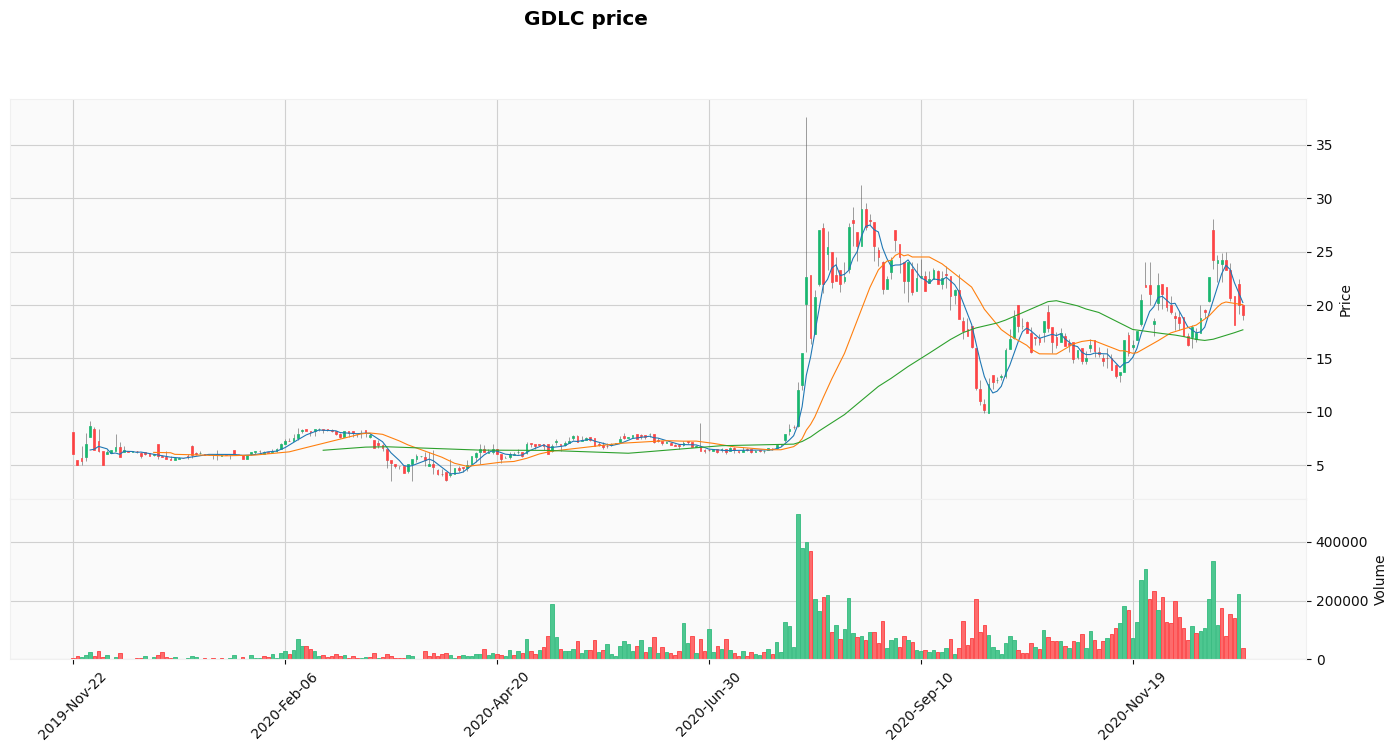

In [19]:
gdlc = get_ticker_history('GDLC')
draw_candlestick(gdlc, 'GDLC price')

In [20]:
gbtc[gbtc['Percent'] == gbtc['Percent'].min()]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Value,Percent
Date,,,,,,,,,
2020-04-01,6.8,6.9,6.41,6.495,4274800.0,0.0,0.0,6.280336,0.033051


In [21]:
gbtc[gbtc['Percent'] < 0.08]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Value,Percent
Date,,,,,,,,,
2020-04-01,6.80,6.900,6.41,6.495,4274800.0,0.0,0.0,6.280336,0.033051
2020-06-29,9.57,9.630,9.18,9.490,4671200.0,0.0,0.0,8.736734,0.079375
2020-07-02,9.87,9.870,9.25,9.370,4585900.0,0.0,0.0,8.672622,0.074427
2020-07-15,9.73,9.730,9.44,9.470,1985900.0,0.0,0.0,8.738619,0.077231
2020-07-16,9.31,9.470,9.30,9.310,2400700.0,0.0,0.0,8.681004,0.067561
2020-07-20,9.58,9.600,9.25,9.420,2752400.0,0.0,0.0,8.711427,0.075220
2020-09-29,11.14,11.200,10.85,11.030,3976900.0,0.0,0.0,10.312789,0.065024
2020-09-30,10.90,11.100,10.00,10.970,3837200.0,0.0,0.0,10.254602,0.065214
2020-10-01,11.20,11.265,10.66,10.870,5354100.0,0.0,0.0,10.098431,0.070981


            Percent Cost  Percent SP   Percent      Close      Value
Date                                                                
2017-12-07      0.459492   -0.027191  0.149241  20.000111  17.015275
2020-12-28     -0.041379   -0.042665  0.154465  30.450001  25.746548


count    315.000000
mean       2.998668
std        3.509195
min       -0.042665
25%        1.215311
50%        1.576734
75%        3.047595
max       13.829980
Name: Percent SP, dtype: float64

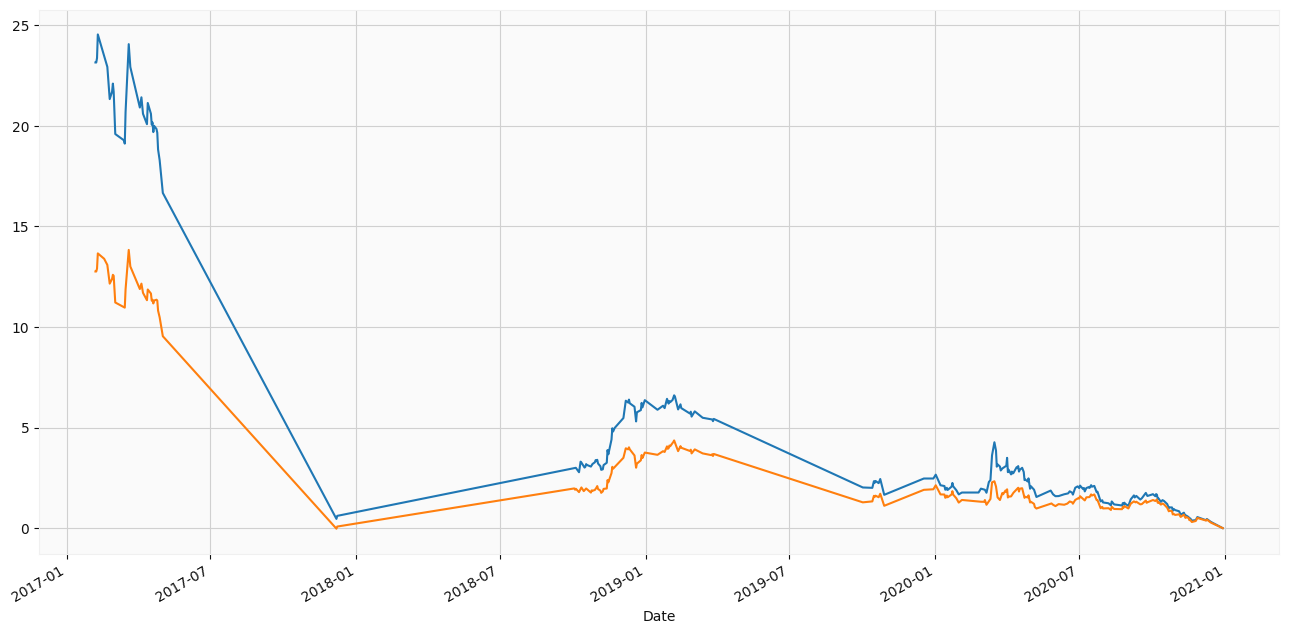

In [23]:
spy = get_ticker_history('SPY', '5y')
df = buy_at_25(gbtc, spy, cost=10000)
df['Percent Cost'].plot(kind='line', figsize=(16, 8))
df['Percent SP'].plot(kind='line', figsize=(16, 8))
df['Percent SP'].describe()
print(df[df['Percent SP'] < 0][columns])
df['Percent SP'].describe()

            Percent Cost  Percent SP   Percent  Close     Value
Date                                                           
2019-01-28      6.427481    4.064583  0.160566   3.93  3.298975
2019-01-31      6.315790    4.105115  0.176205   3.99  3.286943
2019-02-01      6.261194    4.069457  0.175222   4.02  3.315606
2019-02-04      6.371212    4.182473  0.169637   3.96  3.288237
2019-02-05      6.484615    4.284262  0.155107   3.90  3.295085
2019-02-06      6.601563    4.359754  0.154924   3.84  3.245094
2019-02-07      6.542636    4.267509  0.164986   3.87  3.231504
2019-02-14      6.154412    4.074808  0.157311   4.08  3.438171
            Percent Cost  Percent SP   Percent      Close      Value
Date                                                                
2020-12-28     -0.041379   -0.042665  0.154465  30.450001  25.746548


count    225.000000
mean       1.588226
std        0.951843
min       -0.042665
25%        1.111008
50%        1.371730
75%        1.674547
max        4.359754
Name: Percent SP, dtype: float64

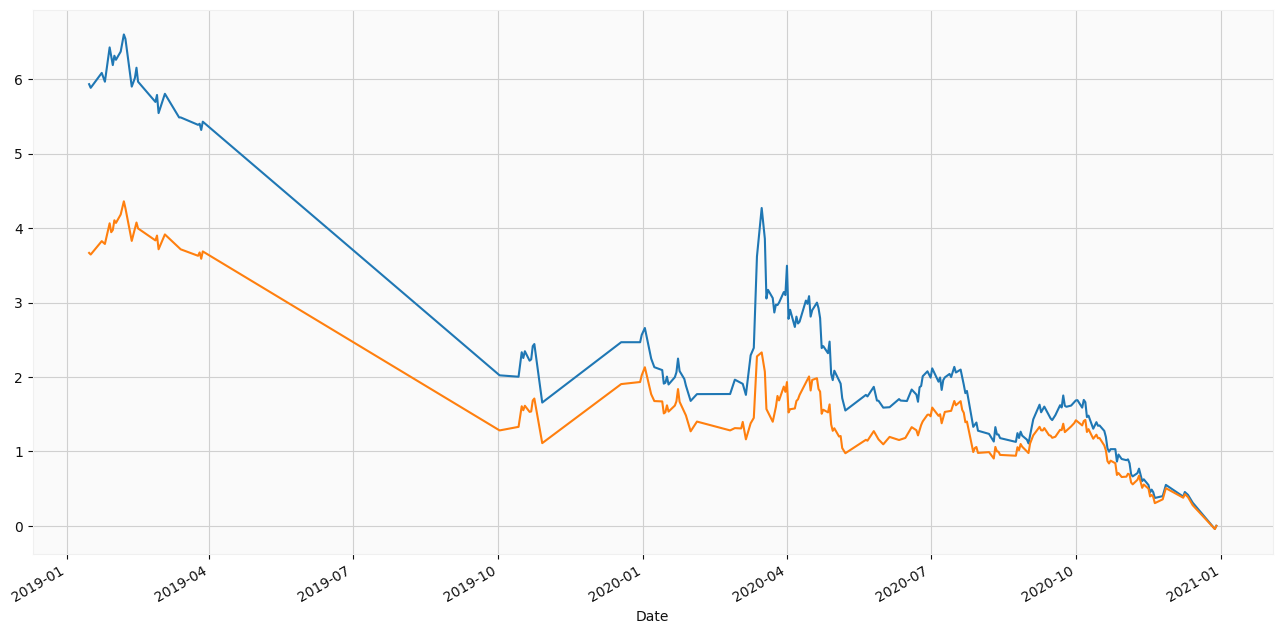

In [26]:
df1 = df.loc[df.index.year >= 2019]
df1['Percent Cost'].plot(kind='line', figsize=(16, 8))
df1['Percent SP'].plot(kind='line', figsize=(16, 8))

print(df1[df1['Percent SP'] >= 4][columns])
print(df1[df1['Percent SP'] == df1['Percent SP'].min()][columns])
df1['Percent SP'].describe()

In [27]:
df.loc[(df.index.year >= 2020) & (df.index.month >= 12)][columns]

,Percent Cost,Percent SP,Percent,Close,Value
Date,,,,,
2020-12-08,0.392653,0.377439,0.169089,20.959999,17.415897
2020-12-09,0.454410,0.425619,0.121217,20.070000,17.637167
2020-12-11,0.416303,0.386185,0.167074,20.610001,17.166614
2020-12-14,0.310732,0.277116,0.178461,22.270000,18.295668
2020-12-24,0.067276,0.056766,0.175022,27.350000,22.563156
2020-12-28,-0.041379,-0.042665,0.154465,30.450001,25.746548
2020-12-29,0.000000,0.000000,0.133079,29.190001,25.305434


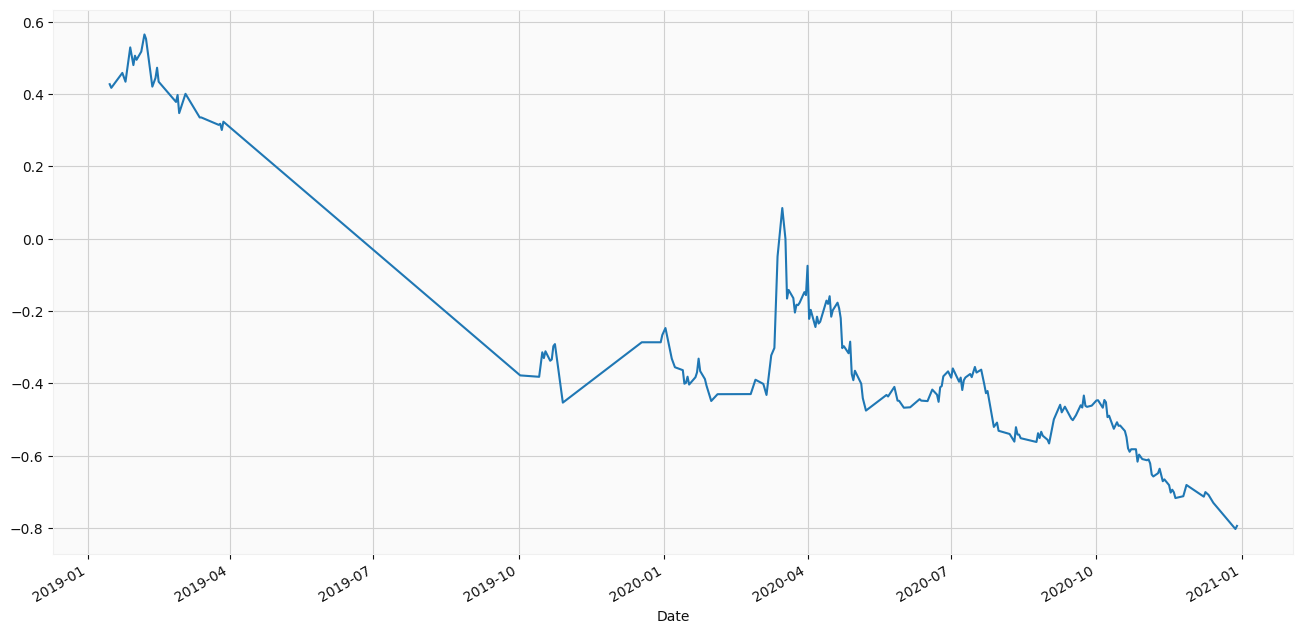

In [28]:
def buy_at_25_bear(df, cost=10000):
    buy_point = df['Percent'] <= df['Percent'].describe()['25%']
    cur_price = gbtc.loc['2020-03-18']['Close']
    shares = cost / df[buy_point]['Close']
    values = cur_price * shares
    
    df1 = pd.DataFrame({'Shares': shares, 'Values': values, 'Percent': (values - cost) / cost})
    return df1
df = buy_at_25_bear(gbtc, cost=10000)
df.loc[df.index.year >= 2019]['Percent'].plot(figsize=(16, 8))

,Crypto Close,Stock Close,Crypto Percent,Stock Percent,Stock Gain
Crypto Close,1.000000,0.963538,0.045813,0.032515,-0.003813
Stock Close,0.963538,1.000000,0.042028,0.056073,0.033623
Crypto Percent,0.045813,0.042028,1.000000,0.709670,-0.083316
Stock Percent,0.032515,0.056073,0.709670,1.000000,0.642958
Stock Gain,-0.003813,0.033623,-0.083316,0.642958,1.000000


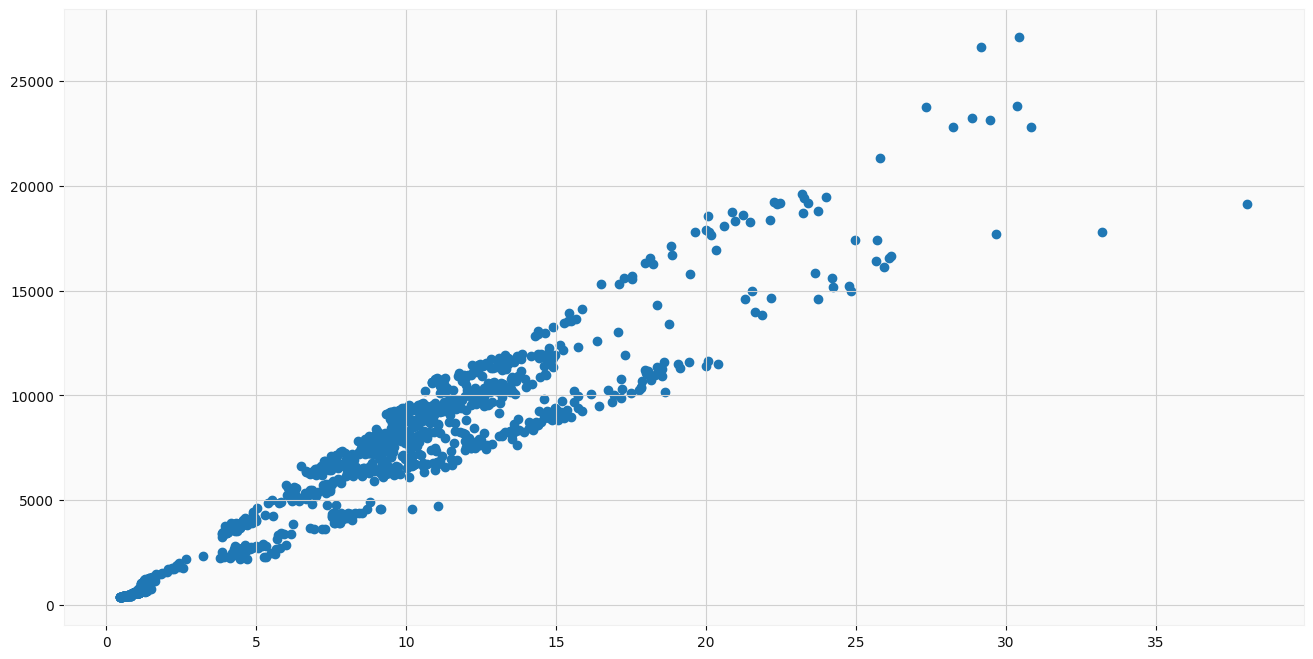

In [29]:
df = get_close_prices(btc, gbtc)
plt.figure(figsize=(16,8))
plt.scatter(df['Stock Close'], df['Crypto Close'])
df.corr()

count    1259.000000
mean        0.000424
std         0.042720
min        -0.244083
25%        -0.021174
50%        -0.001781
75%         0.020610
max         0.358462
Name: Stock Gain, dtype: float64
False    663
True     596
Name: Stock Outperform, dtype: int64


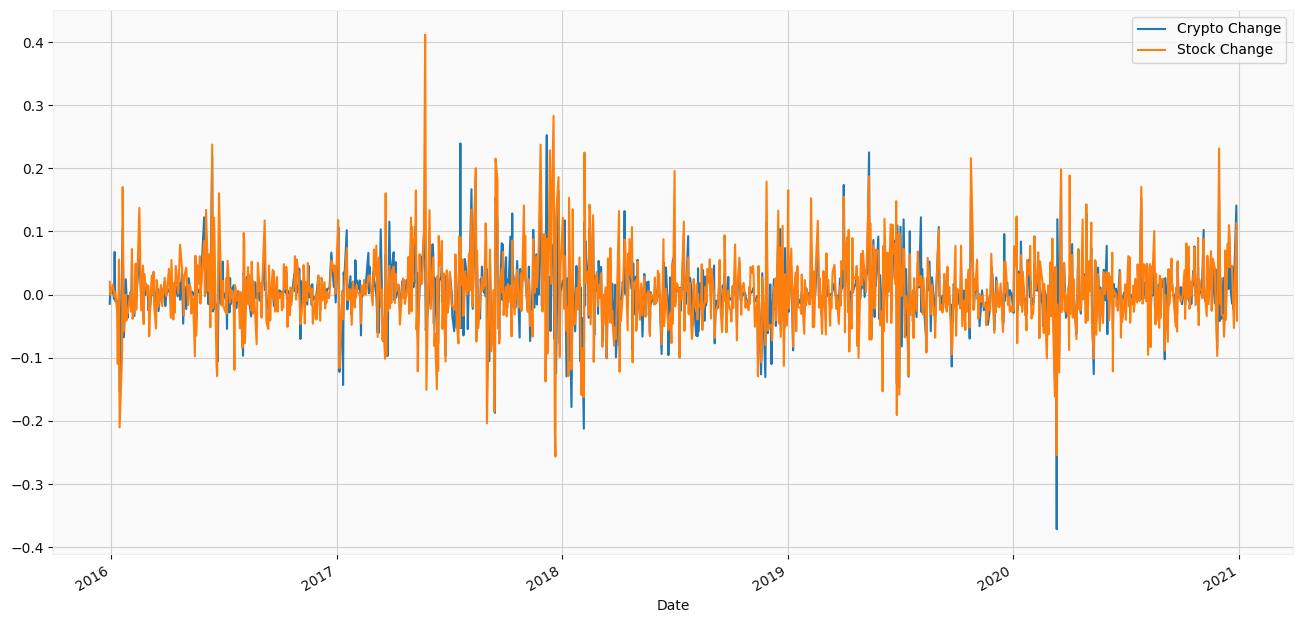

In [30]:
print(df['Stock Gain'].describe())
print(df['Stock Outperform'].value_counts())
df['Crypto Percent'].plot(label='Crypto Change', figsize=(16,8))
df['Stock Percent'].plot(label='Stock Change')
plt.legend()

In [47]:
btc, gbtc = get_crypto_and_stock('BTC-USD', 'GBTC', BTC_NAV, period='1d', interval='1m')

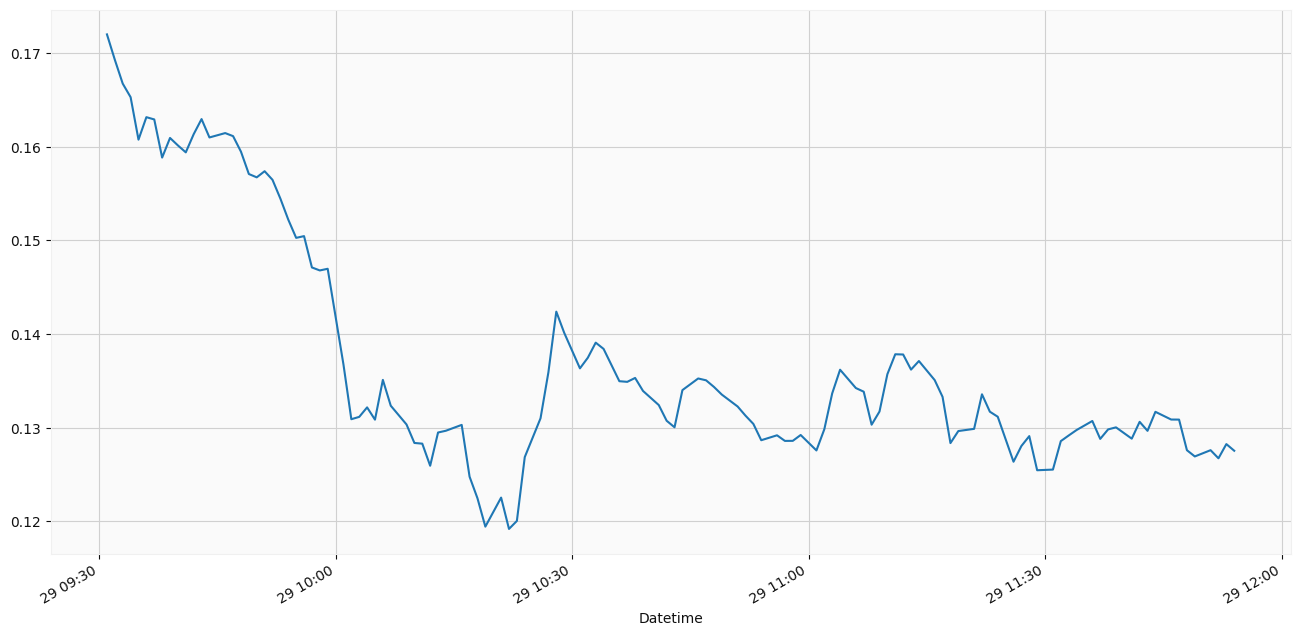

In [48]:
gbtc['Percent'].plot(figsize=(16,8))

In [33]:
btc, gbtc = get_crypto_and_stock('BTC-USD', 'GBTC', BTC_NAV, period='5y')
gbtc.iloc[-1]['Value'] / (1- gbtc['Percent'].quantile([0.1,0.15,0.2,0.25,0.3,0.4,0.5]))
# np.roots([0, (1- .22), gbtc.iloc[-1]['Value']])


0.10    29.441711
0.15    30.036864
0.20    30.570187
0.25    31.015208
0.30    31.501916
0.40    32.661942
0.50    34.326696
Name: Percent, dtype: float64

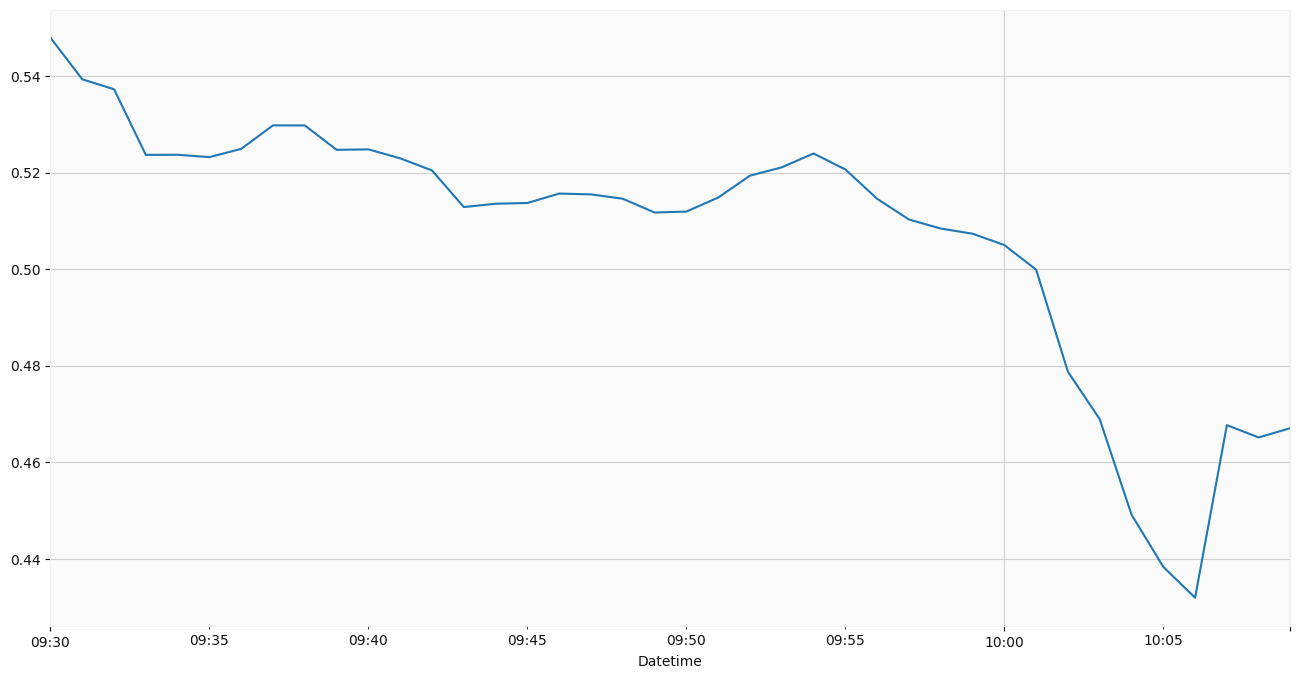

In [34]:
eth, ethe = get_crypto_and_stock('ETH-USD', 'ETHE', ETH_NAV, period='1d', interval='1m')
ethe['Percent'].plot(figsize=(16,8))

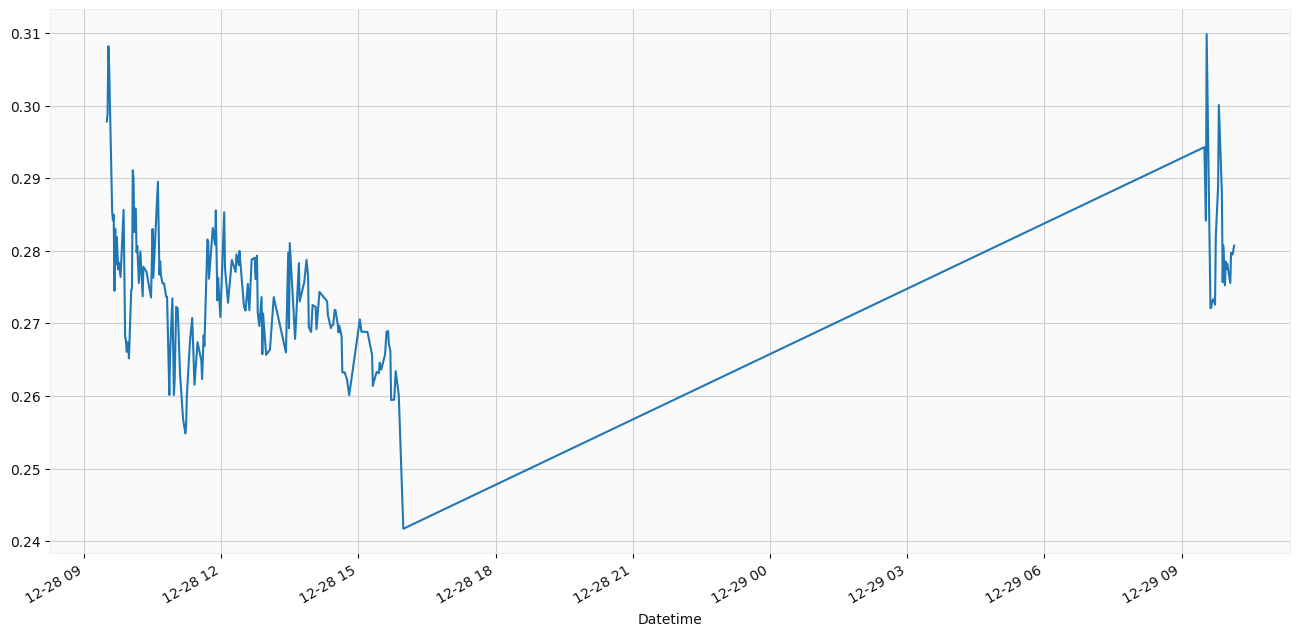

In [35]:
etc, etcg = get_crypto_and_stock('ETC-USD', 'ETCG', ETC_NAV, period='2d', interval='1m')
etcg['Percent'].plot(figsize=(16,8))

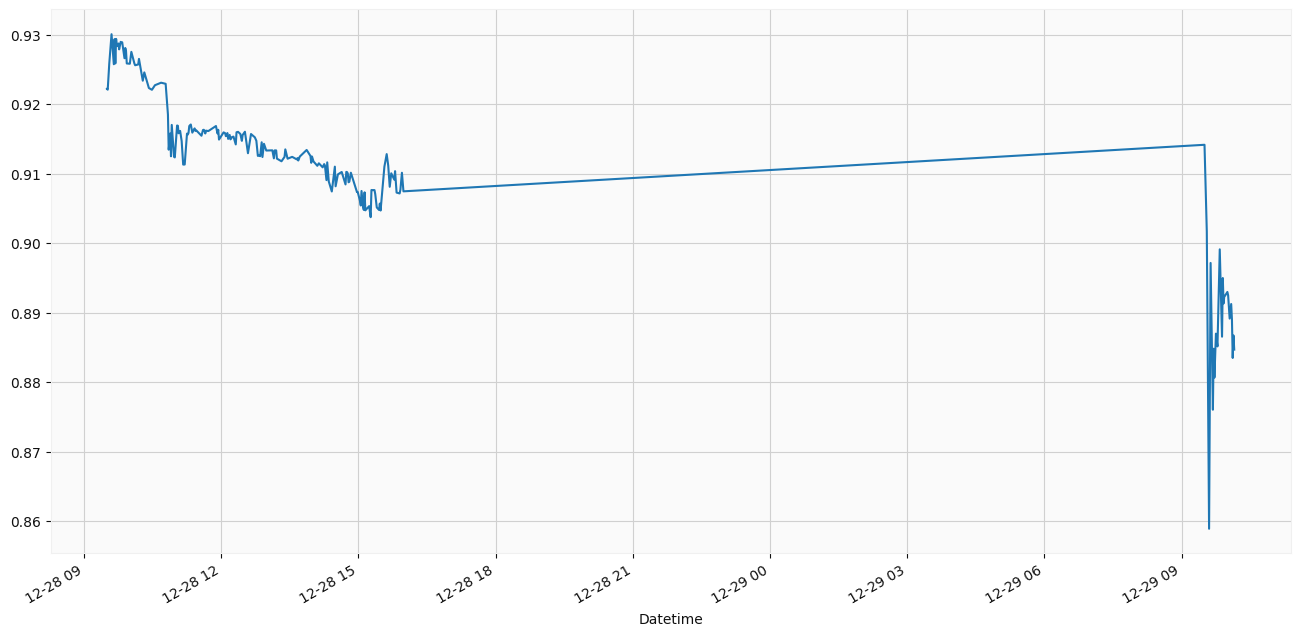

In [36]:
bch, bchg = get_crypto_and_stock('BCH-USD', 'BCHG', BCH_NAV, period='2d', interval='1m')
bchg['Percent'].plot(figsize=(16,8))

,Crypto Close,Stock Close,Crypto Percent,Stock Percent,Stock Gain
Crypto Close,1.000000,0.678955,0.080660,0.210137,0.209685
Stock Close,0.678955,1.000000,-0.257387,0.116572,0.133139
Crypto Percent,0.080660,-0.257387,1.000000,0.369250,0.320679
Stock Percent,0.210137,0.116572,0.369250,1.000000,0.998661
Stock Gain,0.209685,0.133139,0.320679,0.998661,1.000000


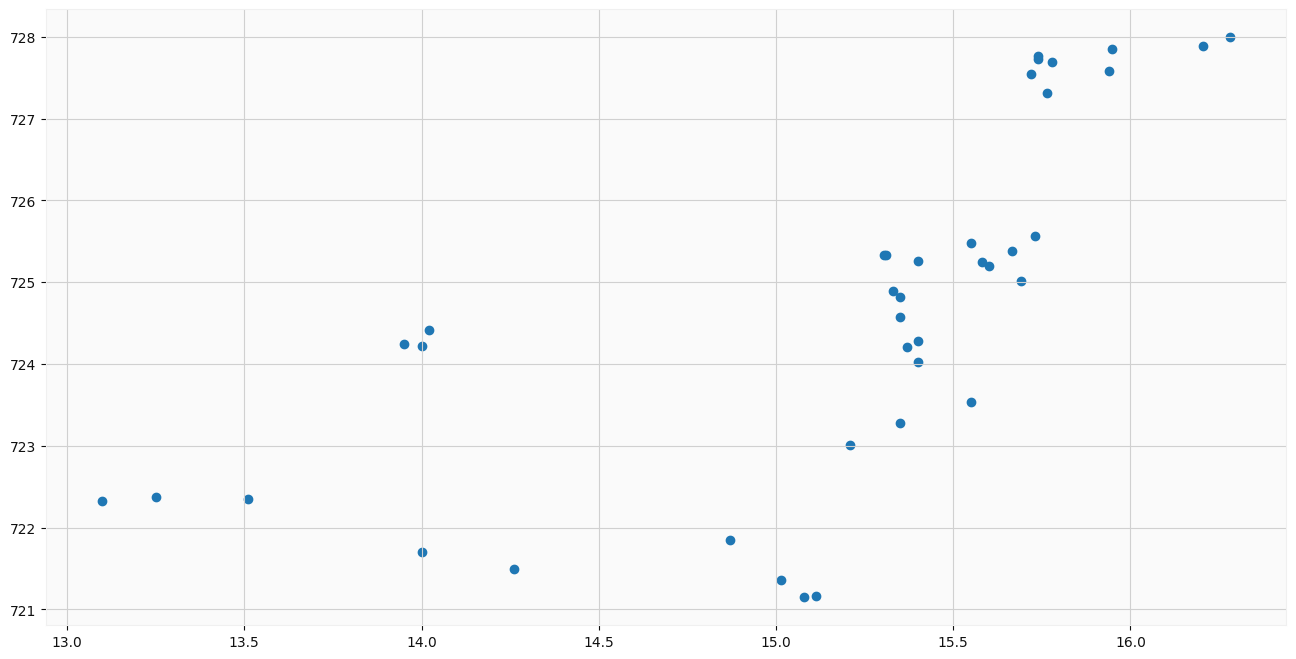

In [37]:
df = get_close_prices(eth, ethe)
plt.figure(figsize=(16,8))
plt.scatter(df['Stock Close'], df['Crypto Close'])
df.corr()

count    98.000000
mean      1.581239
std       0.791926
min       0.214874
25%       1.007453
50%       1.374486
75%       2.026586
max       3.634788
Name: Percent SP, dtype: float64

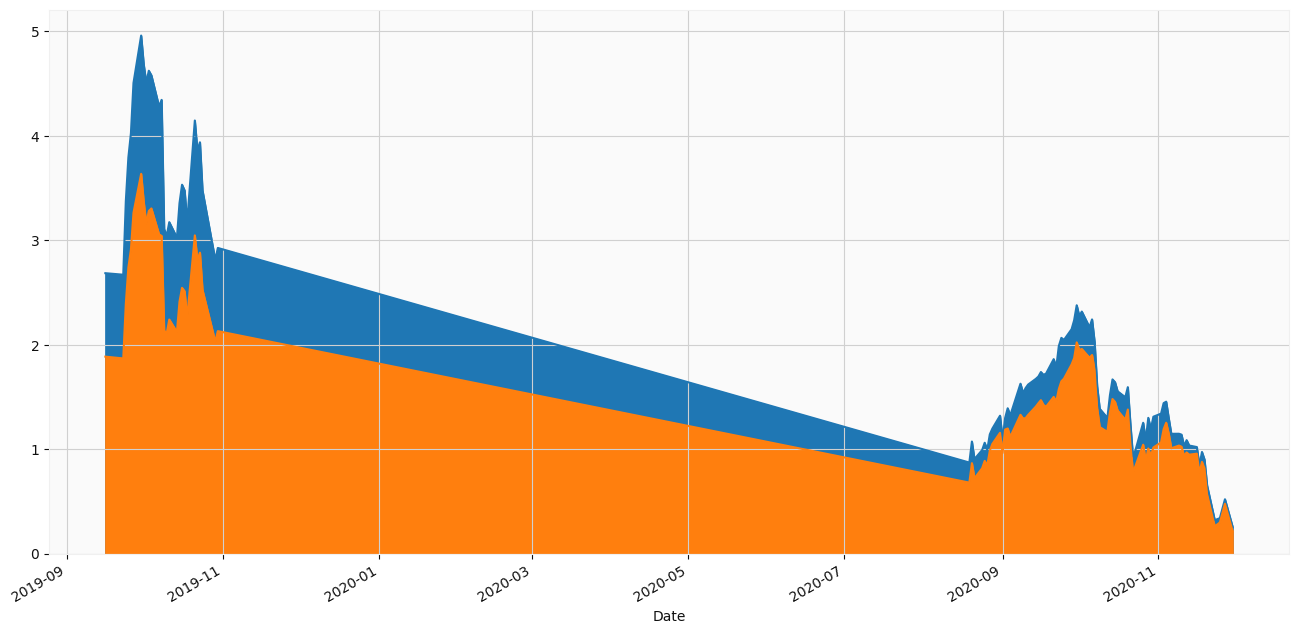

In [38]:
eth, ethe = get_crypto_and_stock('ETH-USD', 'ETHE', ETH_NAV, period='3y')
df = buy_at_25(ethe, spy, cost=10000)
df['Percent Cost'].plot(kind='area', figsize=(16, 8))
df['Percent SP'].plot(kind='area', figsize=(16, 8))
df['Percent SP'].describe()

            Percent Cost  Percent SP   Percent     Close     Value
Date                                                              
2020-09-30      2.377232    2.021979  0.128419  4.255556  3.709062
            Percent Cost  Percent SP   Percent      Close     Value
Date                                                               
2020-11-30      0.255806    0.214874  0.446518  11.444445  6.334298


count    71.000000
mean      1.173550
std       0.400842
min       0.214874
25%       0.933450
50%       1.156846
75%       1.415171
max       2.021979
Name: Percent SP, dtype: float64

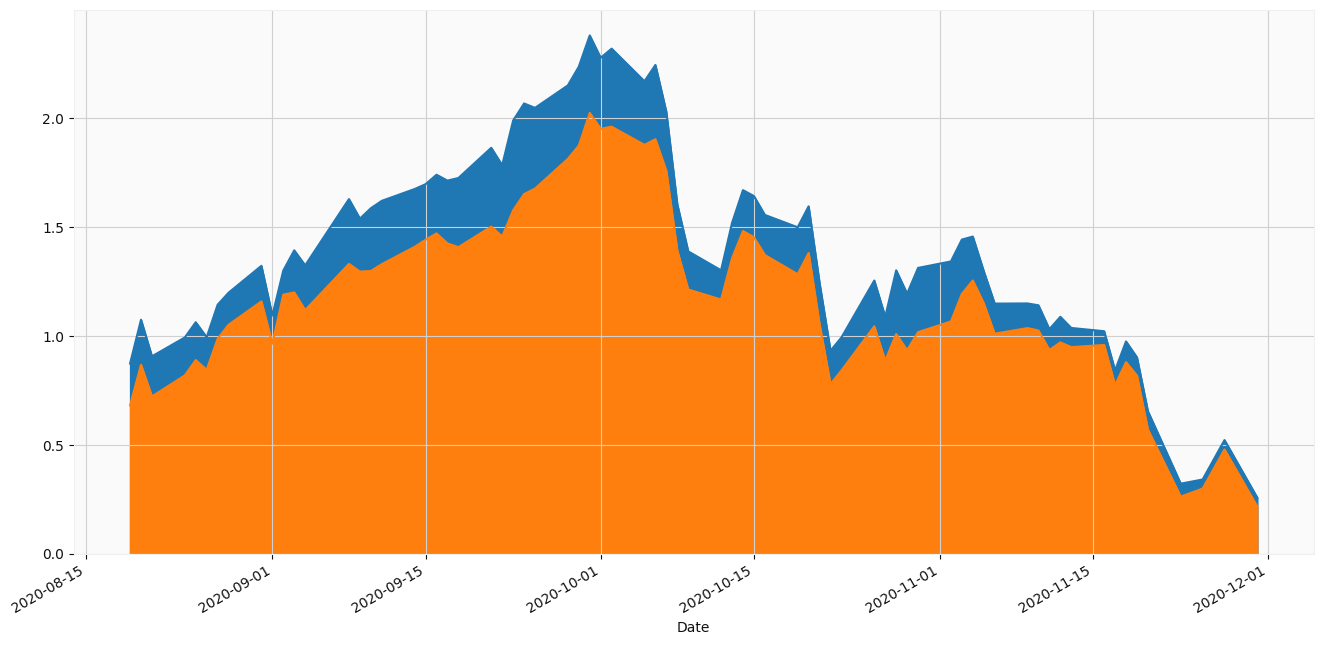

In [39]:
df1 = df.loc[df.index.year >= 2020]
df1['Percent Cost'].plot(kind='area', figsize=(16, 8))
df1['Percent SP'].plot(kind='area', figsize=(16, 8))
columns = ['Percent Cost', 'Percent SP', 'Percent', 'Close', 'Value']
print(df1[df1['Percent SP'] >= 2][columns])
print(df1[df1['Percent SP'] == df1['Percent SP'].min()][columns])
df1['Percent SP'].describe()

In [40]:
eth, ethe = get_crypto_and_stock('ETH-USD', 'ETHE', ETH_NAV, period='3y')
buy_strategy(ethe, [0.1, 0.2, 0.25, 0.3, 0.4, 0.5])

,Percent,Price
0.10,0.316041,10.835081
0.20,0.428734,12.972504
0.25,0.480856,14.274943
0.30,0.513231,15.224373
0.40,0.538912,16.072301
0.50,0.565259,17.046352


In [41]:
pd.set_option('display.max_rows', df.shape[0]+1)
df1.tail()

,Shares,Values,Values SP,Percent Cost,Percent SP,Open,High,Low,Close,Volume,Dividends,Stock Splits,Value,Percent
Date,,,,,,,,,,,,,,
2020-11-20,1150.159716,16530.095145,10532.704240,0.653010,0.569407,7.961111,8.784445,7.941667,8.694445,4027500.0,0.0,0.0,5.251547,0.395988
2020-11-23,918.883014,13206.186434,10469.943450,0.320619,0.261343,9.861111,11.158889,9.777778,10.882778,6985800.0,0.0,0.0,6.268482,0.424000
2020-11-25,932.159529,13396.996504,10319.819606,0.339700,0.298181,12.305555,12.333333,9.444445,10.727777,6249600.0,0.0,0.0,5.879391,0.451947
2020-11-27,1058.076682,15206.677801,10291.158267,0.520668,0.477645,9.416667,10.000000,9.111111,9.451111,3319200.0,0.0,0.0,5.331381,0.435899
2020-11-30,873.786392,12558.057793,10336.921140,0.255806,0.214874,11.638889,11.777778,11.001111,11.444445,3695400.0,0.0,0.0,6.334298,0.446518


In [42]:
btc, gbtc = get_crypto_and_stock('BTC-USD', 'GBTC', BTC_NAV, period='5y')
print('BTC:', btc.iloc[-1]['Close'], 'GBTC:', gbtc.iloc[-1]['Close'])
buy_strategy(gbtc, [0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5])

BTC: 26600.728515625 GBTC: 29.149999618530273


,Percent,Price
0.10,0.141137,29.441711
0.15,0.158155,30.036864
0.20,0.172842,30.570187
0.25,0.184710,31.015208
0.30,0.197306,31.501916
0.40,0.225815,32.661942
0.50,0.263361,34.326696


In [43]:
eth, ethe = get_crypto_and_stock('ETH-USD', 'ETHE', ETH_NAV, period='3y')
print('ETH:', eth.iloc[-1]['Close'], 'ETHE:', ethe.iloc[-1]['Close'])
buy_strategy(ethe, [0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5])

ETH: 719.3286743164062 ETHE: 14.371999740600586


,Percent,Price
0.10,0.316041,10.835081
0.15,0.364942,11.669404
0.20,0.428734,12.972504
0.25,0.480856,14.274943
0.30,0.513231,15.224373
0.40,0.538912,16.072301
0.50,0.565259,17.046352


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Value,Percent
Date,,,,,,,,,
2020-12-22,22.110001,24.980000,22.110001,23.400000,2549200.0,0.0,0.0,6.540465,0.720493
2020-12-23,24.290001,24.299999,19.200001,19.655001,4553300.0,0.0,0.0,6.013609,0.694042
2020-12-24,19.030001,19.090000,15.630000,16.200001,5109100.0,0.0,0.0,6.300967,0.611051
2020-12-28,20.650000,21.299999,16.889999,16.900000,5324700.0,0.0,0.0,7.524780,0.554747
2020-12-29,16.860001,16.860001,13.000000,14.372000,1799129.0,0.0,0.0,7.410747,0.484362
